<a href="https://colab.research.google.com/github/YasudaKaito/pytorch_book_akaishi/blob/main/ch05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

In [2]:
torch.manual_seed(123)
l1 = nn.Linear(1, 1)
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [3]:
for param in l1.named_parameters():
    # param は Tuple[str, Parameter]
    print("name: ", param[0])
    print("tensor: ", param[1])
    print("shape: ", param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [4]:
# 通常乱数値が設定されるパラメタに明示的に設定
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [5]:
import numpy as np
x_np = np.arange(-2, 2.1, 1)
x = torch.tensor(x_np).float()
# 形状を(N,1)に変更
x = x.view(-1, 1)
print(x)

tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [6]:
# y = 2x + 1
y = l1(x)
print(y.data)

tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


In [7]:
# 入力2, 出力1 の線形関数
# y = x1 + x2 + 2
l2 = nn.Linear(2, 1)
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [8]:
# 入力テンソルは列が2つの2次元テンソル
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
x2 = torch.tensor(x2_np).float()
print(x2)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [9]:
y2 = l2(x2)
print(y2.data)

tensor([[2.],
        [3.],
        [3.],
        [4.]])


In [10]:
# 入力2, 出力3の線形関数
# 入力x: (n, 2), 重みw: (3, 2), バイアスb: (3)
l3 = nn.Linear(2, 3)

In [11]:
print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[ 0.5183, -0.5140],
        [-0.5622, -0.4468],
        [ 0.3202, -0.2613]], requires_grad=True)
Parameter containing:
tensor([ 0.2646, -0.6001, -0.4290], requires_grad=True)


In [12]:
nn.init.constant_(l3.weight[0, :], 1.0)
nn.init.constant_(l3.weight[1, :], 2.0)
nn.init.constant_(l3.weight[2, :], 3.0)
nn.init.constant_(l3.bias, 2.0)
print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [13]:
# 入力x: (4, 2) * 重みw.T: (2, 3) + バイアスb: (4, 3) = 出力: (4, 3)
y3 = l3(x2)
print(y3.data)

tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


- 数学の行列計算では行列に対してベクトルを右からかける
- しかし機械学習の流儀では入力データは行列の左からかけて右に出力を出す
  - この関係で重みを転置して形状を合致させている

# 5.6 データ準備

In [14]:
import pandas as pd
# データ準備 Boston Housing DataSets
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [15]:
# 元データが、1件が2行に分かれている
# そのため2行ごとに取得し、列方向に連結する. 2行目の2列目が目的変数(住宅価格)
x_org = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
x_org

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
yt = raw_df.values[1::2, 2]
yt

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [17]:
feature_names = np.array([
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
])

In [18]:
# 平均部屋数(RM)のみ抜き出す
x = x_org[:, feature_names == "RM"]
print(x.shape)
print(x[:5, :])

(506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]


In [19]:
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


In [20]:
!pip install japanize-matplotlib | tail -n 1

In [21]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [22]:
plt.rcParams["axes.grid"] = True

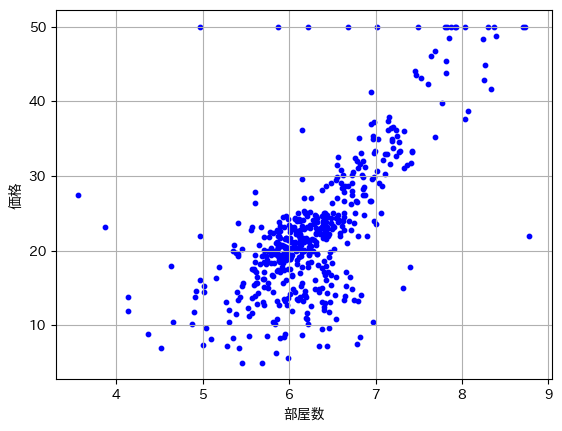

In [23]:
# 部屋数と価格の散布図
plt.scatter(x, yt, s=10, c="b")
plt.xlabel("部屋数")
plt.ylabel("価格")
plt.show()

# 5.7 モデル定義

In [24]:
# 入力次元数
n_input = x.shape[1]
# 出力次元数
n_output = 1

In [25]:
class Net(nn.Module):
    def __init__(self, n_input, n_output) -> None:
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        # 初期値は1
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [26]:
net = Net(n_input, n_output)

In [27]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [29]:
import torch.optim as optim

lr = 0.01
net = Net(n_input, n_output)
# 損失関数
criterion = nn.MSELoss()
# 最適化関数
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
# 損失記録用
history = np.zeros((0, 2))

In [31]:
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

In [32]:
print(inputs.shape)

torch.Size([506, 1])


In [33]:
# 形状を合わせる
labels1 = labels.view(-1, 1)
print(labels1.shape)

torch.Size([506, 1])


In [38]:
for epoch in range(num_epochs):
    # 勾配値初期化
    optimizer.zero_grad()
    # 予測
    outputs = net(inputs)
    # 損失計算
    loss = criterion(outputs, labels1) / 2.0
    # 勾配計算
    loss.backward()
    # パラメタ更新
    optimizer.step()

    if (epoch % 100 == 0):
        loss_item = loss.item()
        history = np.vstack((history, np.array([epoch, loss_item])))
        print(f"Epoch {epoch} loss: {loss_item:.5f}")

Epoch 0 loss: 42.17306
Epoch 100 loss: 41.45518
Epoch 200 loss: 40.98814
Epoch 300 loss: 40.53220
Epoch 400 loss: 40.08710
Epoch 500 loss: 39.65257
Epoch 600 loss: 39.22837
Epoch 700 loss: 38.81425
Epoch 800 loss: 38.40996
Epoch 900 loss: 38.01529
Epoch 1000 loss: 37.62999
Epoch 1100 loss: 37.25385
Epoch 1200 loss: 36.88665
Epoch 1300 loss: 36.52817
Epoch 1400 loss: 36.17820
Epoch 1500 loss: 35.83656
Epoch 1600 loss: 35.50303
Epoch 1700 loss: 35.17743
Epoch 1800 loss: 34.85956
Epoch 1900 loss: 34.54925
Epoch 2000 loss: 34.24632
Epoch 2100 loss: 33.95057
Epoch 2200 loss: 33.66185
Epoch 2300 loss: 33.38000
Epoch 2400 loss: 33.10485
Epoch 2500 loss: 32.83623
Epoch 2600 loss: 32.57399
Epoch 2700 loss: 32.31799
Epoch 2800 loss: 32.06807
Epoch 2900 loss: 31.82409
Epoch 3000 loss: 31.58591
Epoch 3100 loss: 31.35338
Epoch 3200 loss: 31.12638
Epoch 3300 loss: 30.90478
Epoch 3400 loss: 30.68844
Epoch 3500 loss: 30.47724
Epoch 3600 loss: 30.27106
Epoch 3700 loss: 30.06978
Epoch 3800 loss: 29.8732

In [39]:
# 回帰直線の算出
# xの最小値、最大値
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Xse)
print(Yse.numpy())

tensor([[3.5610],
        [8.7800]])
[[-2.1963615]
 [45.19265  ]]


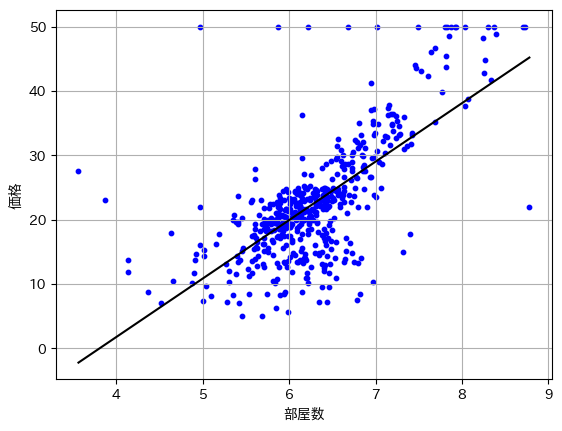

In [40]:
# 散布図と回帰直線
plt.scatter(x, yt, s=10, c="b")
plt.xlabel("部屋数")
plt.ylabel("価格")
plt.plot(Xse.data, Yse.data, c="k")
plt.show()

In [42]:
# 列LSTAT: 低所得者率 の追加
x_add = x_org[:, feature_names == "LSTAT"]
x2 = np.hstack((x, x_add))
print(x2.shape)
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [43]:
# 次元数2
n_input = x2.shape[1]
net = Net(n_input, n_output)

In [44]:
for param in net.named_parameters():
    print(f"変数名: {param[0]}")
    print(f"変数値: {param[1]}")

変数名: l1.weight
変数値: Parameter containing:
tensor([[1., 1.]], requires_grad=True)
変数名: l1.bias
変数値: Parameter containing:
tensor([1.], requires_grad=True)


In [45]:
inputs = torch.tensor(x2).float()

In [47]:
lr = 0.01
# 損失関数
criterion = nn.MSELoss()
# 最適化関数
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
# 損失記録用
history = np.zeros((0, 2))

In [48]:
for epoch in range(num_epochs):
    # 勾配値初期化
    optimizer.zero_grad()
    # 予測
    outputs = net(inputs)
    # 損失計算
    loss = criterion(outputs, labels1) / 2.0
    # 勾配計算
    loss.backward()
    # パラメタ更新
    optimizer.step()

    if (epoch % 100 == 0):
        loss_item = loss.item()
        history = np.vstack((history, np.array([epoch, loss_item])))
        print(f"Epoch {epoch} loss: {loss_item:.5f}")

Epoch 0 loss: 112.06398
Epoch 100 loss: 3753837073642659568666615480320.00000
Epoch 200 loss: inf
Epoch 300 loss: nan
Epoch 400 loss: nan
Epoch 500 loss: nan
Epoch 600 loss: nan
Epoch 700 loss: nan
Epoch 800 loss: nan
Epoch 900 loss: nan
Epoch 1000 loss: nan
Epoch 1100 loss: nan
Epoch 1200 loss: nan
Epoch 1300 loss: nan
Epoch 1400 loss: nan
Epoch 1500 loss: nan
Epoch 1600 loss: nan
Epoch 1700 loss: nan
Epoch 1800 loss: nan
Epoch 1900 loss: nan
Epoch 2000 loss: nan
Epoch 2100 loss: nan
Epoch 2200 loss: nan
Epoch 2300 loss: nan
Epoch 2400 loss: nan
Epoch 2500 loss: nan
Epoch 2600 loss: nan
Epoch 2700 loss: nan
Epoch 2800 loss: nan
Epoch 2900 loss: nan
Epoch 3000 loss: nan
Epoch 3100 loss: nan
Epoch 3200 loss: nan
Epoch 3300 loss: nan
Epoch 3400 loss: nan
Epoch 3500 loss: nan
Epoch 3600 loss: nan
Epoch 3700 loss: nan
Epoch 3800 loss: nan
Epoch 3900 loss: nan


KeyboardInterrupt: 

In [51]:
# 学習率が大き過ぎるので発散した. 再設定する
num_epochs = 2000
lr = 0.001
net = Net(n_input, n_output)
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()
history = np.zeros((0, 2))

In [52]:
for epoch in range(num_epochs):
    # 勾配値初期化
    optimizer.zero_grad()
    # 予測
    outputs = net(inputs)
    # 損失計算
    loss = criterion(outputs, labels1) / 2.0
    # 勾配計算
    loss.backward()
    # パラメタ更新
    optimizer.step()

    if (epoch % 100 == 0):
        loss_item = loss.item()
        history = np.vstack((history, np.array([epoch, loss_item])))
        print(f"Epoch {epoch} loss: {loss_item:.5f}")

Epoch 0 loss: 112.06398
Epoch 100 loss: 25.35892
Epoch 200 loss: 16.39105
Epoch 300 loss: 15.40301
Epoch 400 loss: 15.29414
Epoch 500 loss: 15.28211
Epoch 600 loss: 15.28076
Epoch 700 loss: 15.28059
Epoch 800 loss: 15.28054
Epoch 900 loss: 15.28051
Epoch 1000 loss: 15.28048
Epoch 1100 loss: 15.28046
Epoch 1200 loss: 15.28043
Epoch 1300 loss: 15.28040
Epoch 1400 loss: 15.28037
Epoch 1500 loss: 15.28034
Epoch 1600 loss: 15.28031
Epoch 1700 loss: 15.28028
Epoch 1800 loss: 15.28026
Epoch 1900 loss: 15.28023
